# link to source code

https://github.com/juliafairbank7/juliafairbank7.github.io/tree/main/posts/logistic-regression-post

# Overview of Kernel Logistic Regression

Regular logistic regression is a binary classification machine learning algorithm. One weakness of regular logistic regression is that the algorithm doesn't work well with data that is not linearly separable. Kernel logistic regression is a technique that extends regular logistic regression to be compatible data that is not linearly separable.

Similar to other binary classification machine learning algorithms like perceptron and regular logistic regression, kernel logistic regression aims to predict the label of a data point based on some predictor variables. 

Kernel logistic regression requires us to specify a kernel function and parameters for the kernel function. I'll be using the radial basis function (RBF) kernel function. RBF takes in one parameter, gamma, which controls how “wiggly” the decision boundary should be. Larger gamma means a more wiggly decision boundary.


The algorithm uses a stochastic gradient descent to train the kernel logistic regression model, which is an iterative process. We can set the number of training iterations as well as the learning rate to control how much the parameters change on each update. 

Once the kernel logistic regression model is fully trained, there will be an alpha value for each data point and one bias value.

# Overview of the KLR Functions

# fit()

KernelLogisticRegression.fit(X, y) is the main function that learns the optimal parameters ${v}$. To do this, the function first computes a kernel matrix of X with itself, which is used to minimize the empiricial risk and saved as ${v}$. 

# predict()

KernelLogisticRegression.predict(X) takes the dot product of the kernel matrix of X with the value ${v}$ from the fit() function, then turns dot product value into a binary value.

# score()

KernelLogisticRegression.score(X, y) uses the predict() function to make a prediction matrix of ${X}$ and compute the accuracy. 



# Using the Kernel Logisitic Regression Algorithm

Let's generate a non-lineraly separable dataset to test our algorithm. 

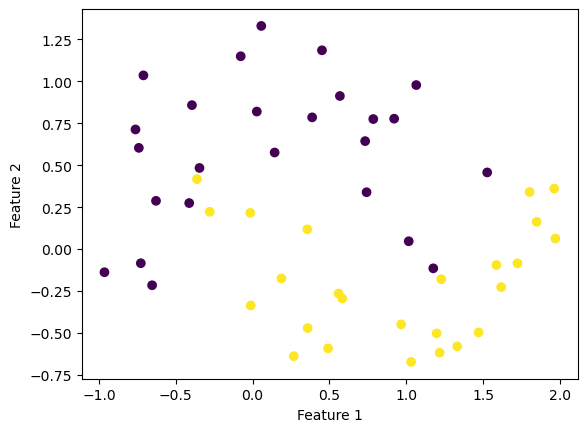

In [81]:
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all="ignore")


X, y = make_moons(50, shuffle = True, noise = 0.2)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

From this dataset, you can start to imagine what the non-linear classification/division might look like. Let's see how the kernel logisitic regression algorithm attempts to classify that separation. 

# kernel logistic regression

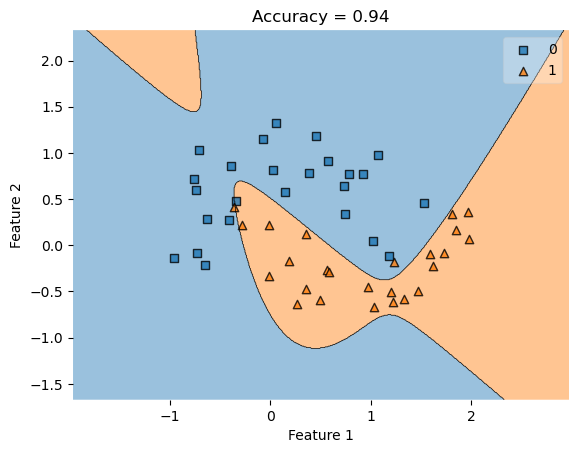

In [82]:
from KernelLogisticRegression import KernelLogisticRegression
from sklearn.metrics.pairwise import rbf_kernel

KLR = KernelLogisticRegression(rbf_kernel, gamma = .1)
KLR.fit(X, y)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {(KLR.predict(X) == y).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Now, let's experiment with this algorithm. Because we are using RBF, let's try changing the value of gamma. As a reminder, a larger gamma means a more wiggly decision boundary.

Let experiment with a large gamma value and see how the algorithm 

# large gamma value

1.0


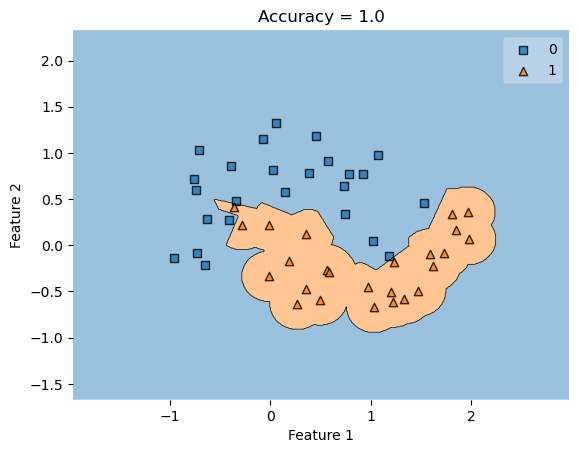

In [84]:
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10000)
KLR.fit(X, y)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

As you can see, the classifier draws an orange blob around the orange data points rather than drawing a line. This is sufficient to achieve 100% accuracy on the training data.

However, if we were to generate new data, we will see a lower accuracy as the classifier blog remains the same, depiste new data points being generated in different locations. 

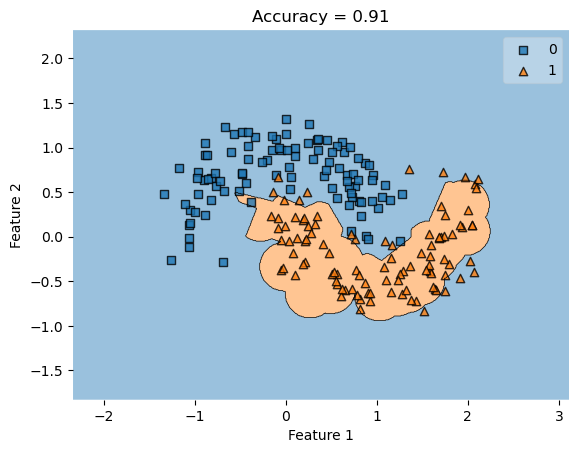

In [85]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Next, let's try varying the noise, which is a parameter when we call make_moons. The noise determines how spread out the two crescents of points are. Let's try changing the amount of noise to see the relationship between noise and gamma.